In [161]:
from train import CarNumbersDataset
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torchsummary
import copy

import matplotlib.pyplot as plt

In [179]:
train_transform = A.Compose([
    A.LongestMaxSize(max_size=224),
    A.ShiftScaleRotate(p=0.5),
    A.PadIfNeeded(224, 224),
])
dataset = CarNumbersDataset('../dataset/classification/train.csv', transform=train_transform)

In [180]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

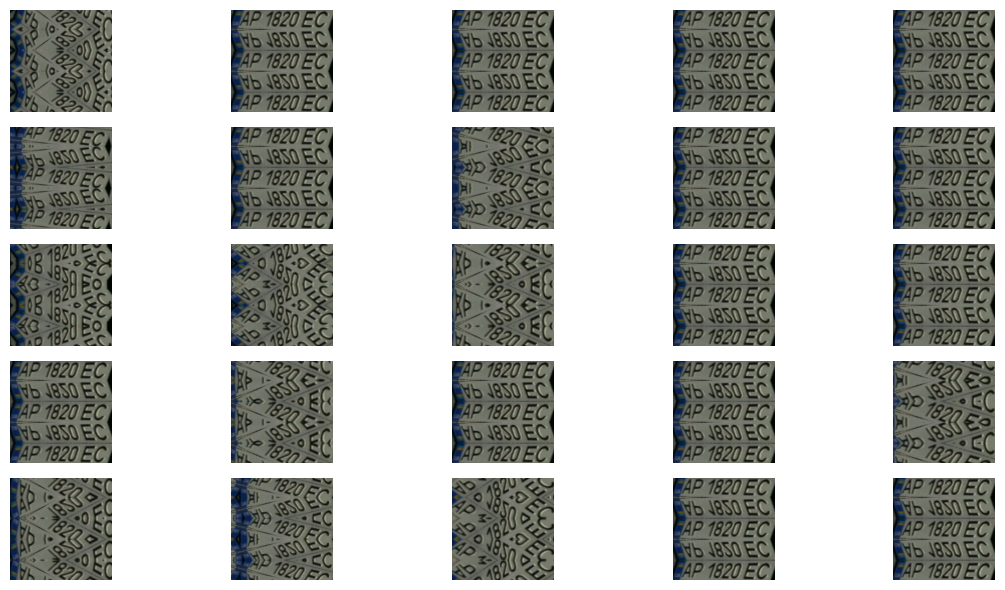

In [181]:
index = np.random.randint(len(dataset))
visualize_augmentations(dataset, idx=index, samples=25)